In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [44]:
# Display the data table for preview
mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [45]:
# Display the data table for preview
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [46]:
# Combine the data into a single dataset
# Merge two dataframes using an inner join
merged_mice_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the merged data table for preview
merged_mice_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
#Check for rows w missing data
merged_mice_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
#Verify data types
merged_mice_df.dtypes


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duped_mice = merged_mice_df[merged_mice_df.duplicated(['Mouse ID', 'Timepoint'])]
duped_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [50]:
# Checking the number of mice in the clean DataFrame.
merged_mice_df['Mouse ID'].nunique()

249

In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Get indexes where name column has value john
indexNames = merged_mice_df[merged_mice_df['Mouse ID'] == 'g989'].index
# Delete these row indexes from dataFrame
merged_mice_df.drop(indexNames , inplace=True)

In [52]:
# Checking the number of mice in the clean DataFrame.
merged_mice_df['Mouse ID'].nunique()

248

In [53]:
#Summary Stats
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#Reaname colume for ease of typing
merged_mice_df = merged_mice_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})
#create the summary stats
var_merged_mice = merged_mice_df[['Drug Regimen', 'Tumor Volume']].groupby('Drug Regimen').var()
median_merged_mice = merged_mice_df[['Drug Regimen', 'Tumor Volume']].groupby('Drug Regimen').median()
sem_merged_mice = merged_mice_df[['Drug Regimen', 'Tumor Volume']].groupby('Drug Regimen').sem()
mean_merged_mice = merged_mice_df[['Drug Regimen', 'Tumor Volume']].groupby('Drug Regimen').mean()
stdev_merged_mice = merged_mice_df[['Drug Regimen', 'Tumor Volume']].groupby('Drug Regimen').std()
#Creat summary stat df to hold above stats
sumStas_merged_mice_df = pd.DataFrame(mean_merged_mice)
#reaname colume for ease of understanding
sumStas_merged_mice_df = sumStas_merged_mice_df.rename(columns={'Tumor Volume': 'Mean'})
#adding other items to the the DF
sumStas_merged_mice_df['Median'] = median_merged_mice
sumStas_merged_mice_df['Variance'] = var_merged_mice
sumStas_merged_mice_df['StDev'] = stdev_merged_mice
sumStas_merged_mice_df['SEM'] = sem_merged_mice
#display DF
sumStas_merged_mice_df




,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
other_sumStats = merged_mice_df[['Drug Regimen', 'Tumor Volume']].groupby('Drug Regimen').agg({'Tumor Volume' : ['mean', 'median', 'var', 'std', 'sem']})
other_sumStats

Tumor Volume                                          
                     mean     median        var       std       sem
Drug Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

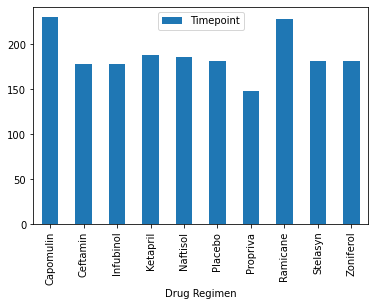

Text(3.200000000000003, 0.5, '# of treatments')

<Figure size 432x288 with 0 Axes>

In [55]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

count_mice = merged_mice_df[['Timepoint', 'Drug Regimen']].groupby('Drug Regimen')
count_mice = count_mice.count()
count_mice
count_chart = count_mice.plot(kind='bar')
plt.show()
plt.tight_layout()
count_chart.set_xlabel("Timepoint")
count_chart.set_ylabel("# of treatments")


Text(0, 0.5, 'Number of measurments')

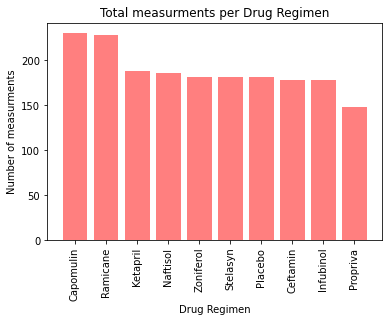

In [56]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

pyplot_mice = merged_mice_df['Drug Regimen'].value_counts()
pyplot_mice
regimen = pyplot_mice
counts = pyplot_mice
x_axis = np.arange(len(counts))
plt.bar(x_axis, regimen, color='r', alpha=0.5, align="center")
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, pyplot_mice.index, rotation="vertical")
plt.title("Total measurments per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of measurments")

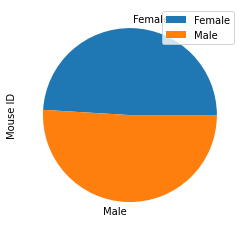

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gen_plot = merged_mice_df.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID')
gen_plot




(-1.1041200173094385,
 1.1079114197007642,
 -1.1065502689644005,
 1.1003119175697333)

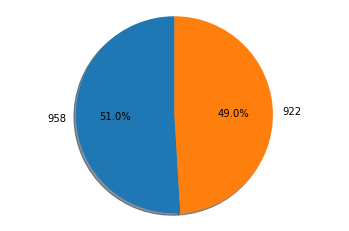

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_pie_mice = merged_mice_df['Sex'].value_counts()
py_pie_mice
gen = py_pie_mice
counts2 = py_pie_mice
x_axis = np.arange(len(counts2))
#plt.pie(x_axis, regimen, color='r', alpha=0.5, align="center")
plt.pie(counts2, labels=gen, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


In [158]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = merged_mice_df.groupby(['Drug Regimen', 'Mouse ID'],sort=False)['Timepoint'].max()
greatest_timepoint.drop(['Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'], inplace=True)
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)
greatest_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_timepoint = pd.merge(greatest_timepoint_df, merged_mice_df, how='left', on=['Mouse ID', 'Timepoint'])
merged_timepoint_df = merged_timepoint.loc[:, ['Mouse ID', 'Timepoint', 'Tumor Volume','Drug Regimen']]
merged_timepoint_df

C:\Users\wmorg\anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:3878: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Mouse ID,Timepoint,Tumor Volume,Drug Regimen
0,k403,45,22.050126,Ramicane
1,s185,45,23.343598,Capomulin
2,x401,45,28.484033,Capomulin
3,m601,45,28.430964,Capomulin
4,g791,45,29.128472,Ramicane
...,...,...,...,...
95,x822,45,61.386660,Ceftamin
96,y163,45,67.685569,Infubinol
97,y769,45,68.594745,Ceftamin
98,y865,45,64.729837,Ceftamin


In [167]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#cap_list = merged_mice_df.loc[merged_mice_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for drug in treatment_list:
    newdata = merged_timepoint_df.loc[merged_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume']
    tumor_vol_data.append([newdata])
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = newdata.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
 
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
   
    print('_______________________')

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
_______________________
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
_______________________
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
_______________________
The lower quartile of Ceftamin is: 4

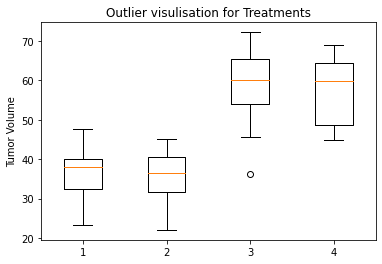

In [164]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
cap_data = merged_timepoint_df.loc[merged_timepoint_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume']
ram_data = merged_timepoint_df.loc[merged_timepoint_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume']
inf_data = merged_timepoint_df.loc[merged_timepoint_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume']
cef_data = merged_timepoint_df.loc[merged_timepoint_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume']



fig1, ax1 = plt.subplots()
ax1.set_title('Outlier visulisation for Treatments')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot([cap_data, ram_data, inf_data, cef_data])
plt.show()


Text(0, 0.5, 'Tumor Volume')

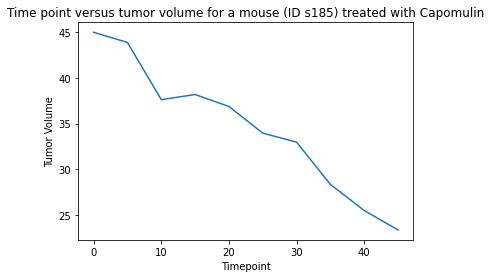

In [163]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_data = merged_mice_df.loc[merged_mice_df['Mouse ID'] == 's185']
s185_plot = s185_data.loc[:, ['Mouse ID', 'Timepoint', 'Tumor Volume']]
timepoint = s185_plot['Timepoint']
tumorvol = s185_plot['Tumor Volume']
plt.plot(timepoint,tumorvol)
plt.title("Time point versus tumor volume for a mouse (ID s185) treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

Text(0, 0.5, 'Weight (g)')

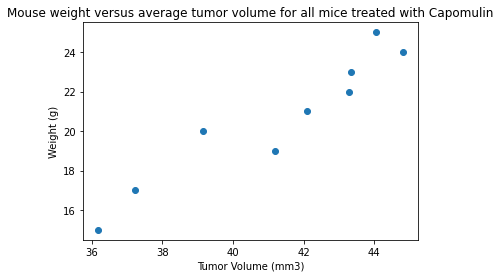

In [63]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = merged_mice_df.loc[merged_mice_df['Drug Regimen'] == 'Capomulin']
capomulin_data2 = capomulin_data.groupby(['Weight (g)'])
capomulin_data2.mean()
capomulin_plot = pd.DataFrame(capomulin_data2.mean())
capomulin_plot2 = capomulin_plot.drop(['Age_months', 'Timepoint', 'Metastatic Sites'], axis=1)
capomulin_plot2 = capomulin_plot2.reset_index()
capomulin_plot2

weight3 = capomulin_plot2['Weight (g)']
tumorvol3 = capomulin_plot2['Tumor Volume']

plt.scatter(tumorvol3, weight3)
plt.title("Mouse weight versus average tumor volume for all mice treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

In [64]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# The next example will compute the Pearson correlation coefficient 

correlation = st.pearsonr(weight3,tumorvol3)
print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is 0.95


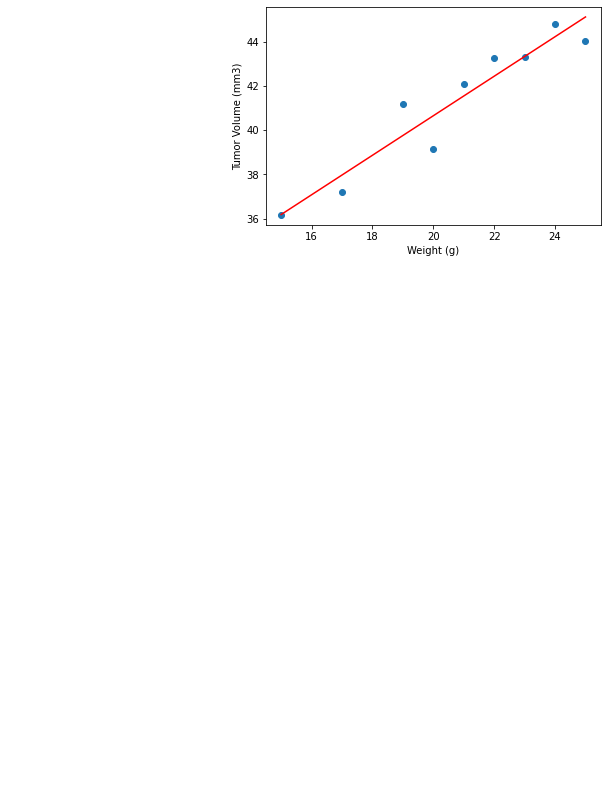

In [70]:
# Add the linear regression equation and line to plot
x_values = weight3
y_values = tumorvol3
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

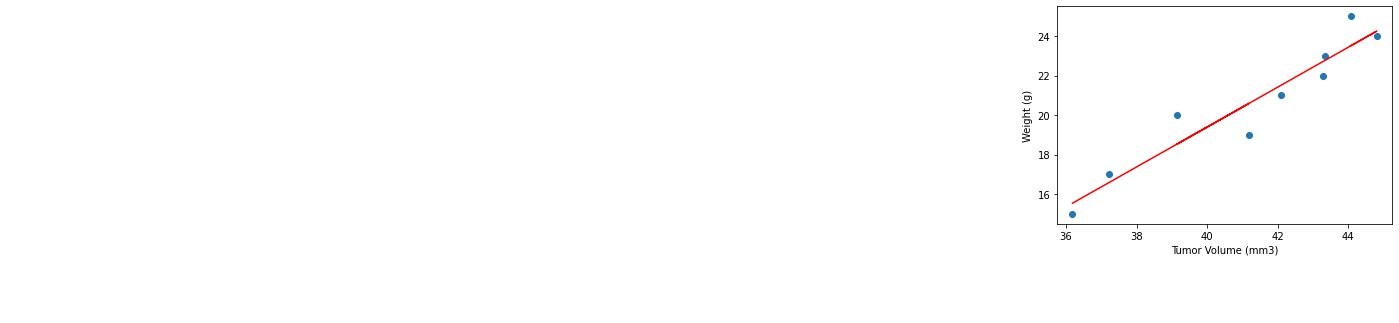

In [69]:
# Add the linear regression equation and line to plot
x_values = tumorvol3
y_values = weight3
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()